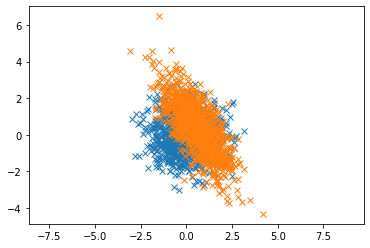

In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

######## Data Generation ############
np.random.seed(0)
x,y = np.random.multivariate_normal([0,0],[[1,0],[0,1]],1000).T
data1 = np.append(x.reshape(1000,1),y.reshape(1000,1),axis=1)
labels1 = (np.ones(1000))*-1
x,y = np.random.multivariate_normal([0.5,0.5],[[1,-1],[-1,2]],1000).T
data2 = np.append(x.reshape(1000,1),y.reshape(1000,1),axis=1)
labels2 = np.ones(1000)
data = np.append(data1,data2, axis=0)
labels = np.append(labels1, labels2, axis=0)
labels = labels.reshape(2000,1)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
plt.plot(data1[:,:1],data1[:,1:],'x')
plt.plot(data2[:,:1],data2[:,1:],'x')
plt.axis('equal'); plt.show()

In [4]:
############# Converting Data from numpy to tensors

import torch
import torch.nn as nn


X = torch.tensor(X_train, dtype=torch.float) 
y = torch.tensor(y_train, dtype=torch.float) 
xPredicted = torch.tensor(X_test, dtype=torch.float)

/home/sunil/my_projects/my_project_env/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  # This is added back by InteractiveShellApp.init_path()


Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Tanh()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)
Epoch 0 - Training loss: 0.9792749267187901
Epoch 1 - Training loss: 0.9469169541436713
Epoch 2 - Training loss: 0.9397896654732176
Epoch 3 - Training loss: 0.9388717931311112
Epoch 4 - Training loss: 0.9380523201116011
Epoch 5 - Training loss: 0.9369114744663238
Epoch 6 - Training loss: 0.936107514706091
Epoch 7 - Training loss: 0.9357680794844054
Epoch 8 - Training loss: 0.9355092417617561
Epoch 9 - Training loss: 0.9353431034635287
Epoch 10 - Training loss: 0.9353434111713432
Epoch 11 - Training loss: 0.9353843283059541
Epoch 12 - Training loss: 0.9354495704371948
Epoch 13 - Training loss: 0.9355371943907812
Epoch 14 - Training loss: 0.9356644351966679
Epoch 15 - Training loss: 0.9358183587051463
Epoch 16 - Training loss: 0.936047064626473
Epoch 17 - Training loss: 0.9364694871171377
Epoch 18 - Training loss: 0.9371738609886962


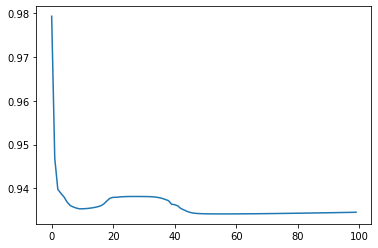

Accuracy of model with Pytorch library:  0.67


In [9]:
import matplotlib.pyplot as plt
from torch import nn, optim
from sklearn.metrics import accuracy_score

input_size = 2
hidden_size = 2
output_size = 1

def init_weights_random(m):
    if type(m) == nn.Linear:
        torch.nn.init.xavier_uniform(m.weight)
        m.bias.data.fill_(0.01)

model = nn.Sequential(nn.Linear(input_size, hidden_size),
                      nn.Tanh(),
                      nn.Linear(hidden_size, output_size),
                      nn.Sigmoid())

model.apply(init_weights_random)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
epochs = 100
learning_rate = []
for e in range(epochs):
    running_loss = 0
    for i in range(X_train.shape[0]):
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(X[i])
        loss = criterion(output, y[i])
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()   
    print("Epoch {} - Training loss: {}".format(e, running_loss/X_train.shape[0]))
    learning_rate.append(running_loss/X_train.shape[0])
    
epochs = list(range(epochs))
plt.plot(epochs, learning_rate)
plt.show()

y_pred = []
with torch.no_grad():
    for i in range(X_test.shape[0]):
        logps = model(xPredicted[i])
        if(logps>0.001):
            y_pred.append(1)
        else:
            y_pred.append(-1)

acc = accuracy_score(y_test, y_pred)
print("Accuracy of model with Pytorch library: ", acc)

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Tanh()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)
Epoch 0 - Training loss: 0.9910507514281198
Epoch 1 - Training loss: 0.9561752151697874
Epoch 2 - Training loss: 0.953408788619563
Epoch 3 - Training loss: 0.9524782893853262
Epoch 4 - Training loss: 0.9520545957656578
Epoch 5 - Training loss: 0.9518140847515315
Epoch 6 - Training loss: 0.9516581312334165
Epoch 7 - Training loss: 0.9515486626280472
Epoch 8 - Training loss: 0.9514677847828716
Epoch 9 - Training loss: 0.9514057403989136
Epoch 10 - Training loss: 0.9513568169111386
Epoch 11 - Training loss: 0.9513173662079498
Epoch 12 - Training loss: 0.9512849785480648
Epoch 13 - Training loss: 0.951258048787713
Epoch 14 - Training loss: 0.9512352765956894
Epoch 15 - Training loss: 0.9512158983713016
Epoch 16 - Training loss: 0.9511992159904912
Epoch 17 - Training loss: 0.9511847451375798
Epoch 18 - Training loss: 0.9511721015814691


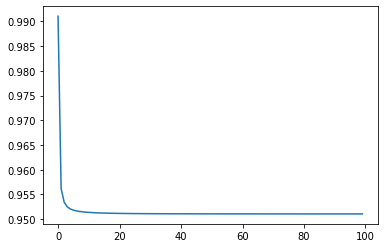

Accuracy of model with Pytorch library:  0.67


In [10]:
## Model with weights initialized as 0.0
def init_weights_zero(m):
    if type(m) == nn.Linear:
        m.weight.data.fill_(0.0)
        m.bias.data.fill_(0.01)

model.apply(init_weights_zero)

print(model)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
epochs = 100
learning_rate = []
for e in range(epochs):
    running_loss = 0
    for i in range(X_train.shape[0]):
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(X[i])
        loss = criterion(output, y[i])
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()   
    print("Epoch {} - Training loss: {}".format(e, running_loss/X_train.shape[0]))
    learning_rate.append(running_loss/X_train.shape[0])
    
epochs = list(range(epochs))
plt.plot(epochs, learning_rate)
plt.show()
        
y_pred = []
with torch.no_grad():
    for i in range(X_test.shape[0]):
        logps = model(xPredicted[i])
        if(logps>0.001):
            y_pred.append(1)
        else:
            y_pred.append(-1)

acc = accuracy_score(y_test, y_pred)
print("Accuracy of model with Pytorch library: ", acc)

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Tanh()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)


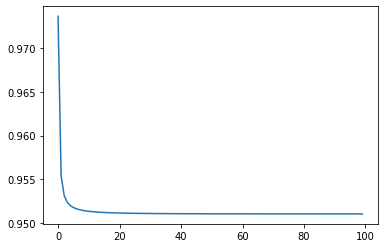

Accuracy of model with Pytorch library:  0.67


In [11]:
## Model with weights initialized as 1.0
def init_weights_one(m):
    if type(m) == nn.Linear:
        m.weight.data.fill_(1.0)
        m.bias.data.fill_(0.01)

model.apply(init_weights_one)

print(model)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
epochs = 100
learning_rate = []
for e in range(epochs):
    running_loss = 0
    for i in range(X_train.shape[0]):
    
        # Training pass
        optimizer.zero_grad()
        
        output = model(X[i])
        loss = criterion(output, y[i])
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item() 
    learning_rate.append(running_loss/X_train.shape[0])
    
epochs = list(range(epochs))
plt.plot(epochs, learning_rate)
plt.show()
    
y_pred = []
with torch.no_grad():
    for i in range(X_test.shape[0]):
        logps = model(xPredicted[i])
        if(logps>0.001):
            y_pred.append(1)
        else:
            y_pred.append(-1)

acc = accuracy_score(y_test, y_pred)
print("Accuracy of model with Pytorch library: ", acc)